In [1]:
!git clone https://github.com/resemble-ai/Resemblyzer.git
!cd Resemblyzer

Cloning into 'Resemblyzer'...
remote: Enumerating objects: 602, done.
remote: Total 602 (delta 0), reused 0 (delta 0), pack-reused 602
Receiving objects: 100% (602/602), 101.46 MiB | 36.80 MiB/s, done.
Resolving deltas: 100% (107/107), done.


In [2]:
import os
os.chdir(r"/content/Resemblyzer")

In [3]:
!pip install -r /content/Resemblyzer/requirements_demos.txt
!pip install -r /content/Resemblyzer/requirements_package.txt

     |████████████████████████████████| 66 kB 2.3 MB/s 
     |████████████████████████████████| 78 kB 5.5 MB/s 
     |████████████████████████████████| 86 kB 4.0 MB/s 
     |████████████████████████████████| 1.1 MB 23.8 MB/s 
  Created wheel for webrtcvad: filename=webrtcvad-2.0.10-cp37-cp37m-linux_x86_64.whl size=72369 sha256=77ce4e028274a9178bb72c9ce6ba9364e6ce82fe04ac26503d43ed764eaf4dbc
  Stored in directory: /root/.cache/pip/wheels/11/f9/67/a3158d131f57e1c0a7d8d966a707d4a2fb27567a4fe47723ad
  Created wheel for typing: filename=typing-3.7.4.3-py3-none-any.whl size=26324 sha256=c66f2d4eba5215222150f61de22b10ff9034f311153d7ec1fb6a90ac5680b641
  Stored in directory: /root/.cache/pip/wheels/35/f3/15/01aa6571f0a72ee6ae7b827c1491c37a1f72d686fd22b43b0e
  Created wheel for umap-learn: filename=umap_learn-0.5.2-py3-none-any.whl size=82709 sha256=3004588a142d72bb75c09c63d6c2d19a3d2f6ef26570dea95cc29f019716c334
  Stored in directory: /root/.cache/pip/wheels/84/1b/c6/aaf68a748122632967cef4dffe

In [3]:
from Resemblyzer.resemblyzer import preprocess_wav, VoiceEncoder
from pathlib import Path

#give the file path to your audio file
audio_file_path = '/content/drive/MyDrive/Depression_Detection/test2.wav'
wav_fpath = Path(audio_file_path)

wav = preprocess_wav(wav_fpath)
encoder = VoiceEncoder("cpu")
_, cont_embeds, wav_splits = encoder.embed_utterance(wav, return_partials=True, rate=16)
print(cont_embeds.shape)

Loaded the voice encoder model on cpu in 0.05 seconds.
(1039, 256)


In [4]:
!pip3 install spectralcluster

In [9]:
SpectralClusterer?

In [37]:
from spectralcluster import RefinementOptions
from spectralcluster import ThresholdType
from spectralcluster import ICASSP2018_REFINEMENT_SEQUENCE
refinement_option_1 = RefinementOptions(gaussian_blur_sigma=1,
    p_percentile=0.90,
    thresholding_soft_multiplier=0.05,
    thresholding_type=ThresholdType.RowMax,
    refinement_sequence=ICASSP2018_REFINEMENT_SEQUENCE)

In [38]:
from spectralcluster import SpectralClusterer

clusterer = SpectralClusterer(
    min_clusters=2,
    max_clusters=2,refinement_options=refinement_option_1, custom_dist="cosine")

labels = clusterer.predict(cont_embeds)

In [39]:
def create_labelling(labels,wav_splits):
    from Resemblyzer.resemblyzer import sampling_rate
    times = [((s.start + s.stop) / 2) / sampling_rate for s in wav_splits]
    labelling = []
    start_time = 0

    for i,time in enumerate(times):
        if i>0 and labels[i]!=labels[i-1]:
            temp = [str(labels[i-1]),start_time,time]
            labelling.append(tuple(temp))
            start_time = time
        if i==len(times)-1:
            temp = [str(labels[i]),start_time,time]
            labelling.append(tuple(temp))

    return labelling
  
labelling = create_labelling(labels,wav_splits)

In [40]:
labelling

[('1', 0, 7.28),
 ('0', 7.28, 8.6),
 ('1', 8.6, 11.6),
 ('0', 11.6, 16.4),
 ('1', 16.4, 22.58),
 ('0', 22.58, 29.84),
 ('1', 29.84, 34.22),
 ('0', 34.22, 42.38),
 ('1', 42.38, 55.04),
 ('0', 55.04, 56.18),
 ('1', 56.18, 56.3),
 ('0', 56.3, 56.42),
 ('1', 56.42, 56.54),
 ('0', 56.54, 57.62),
 ('1', 57.62, 57.68),
 ('0', 57.68, 59.6),
 ('1', 59.6, 63.08)]

In [1]:
!pip install -q pyannote.audio==1.1

     |████████████████████████████████| 230 kB 5.3 MB/s 
     |████████████████████████████████| 41 kB 218 kB/s 
     |████████████████████████████████| 49 kB 4.8 MB/s 
     |████████████████████████████████| 59 kB 6.1 MB/s 
     |████████████████████████████████| 130 kB 26.0 MB/s 
     |████████████████████████████████| 308 kB 37.7 MB/s 
     |████████████████████████████████| 80 kB 7.5 MB/s 
     |████████████████████████████████| 209 kB 41.4 MB/s 
     |████████████████████████████████| 75 kB 3.7 MB/s 
     |████████████████████████████████| 149 kB 34.3 MB/s 
     |████████████████████████████████| 49 kB 5.2 MB/s 
     |████████████████████████████████| 112 kB 46.8 MB/s 


In [2]:
!wget -q http://groups.inf.ed.ac.uk/ami/AMICorpusMirror/amicorpus/ES2004a/audio/ES2004a.Mix-Headset.wav
DEMO_FILE = {'uri': 'ES2004a.Mix-Headset', 'audio': 'ES2004a.Mix-Headset.wav'}

In [3]:
!wget -q https://raw.githubusercontent.com/pyannote/pyannote-audio/master/tutorials/data_preparation/AMI/MixHeadset.test.rttm

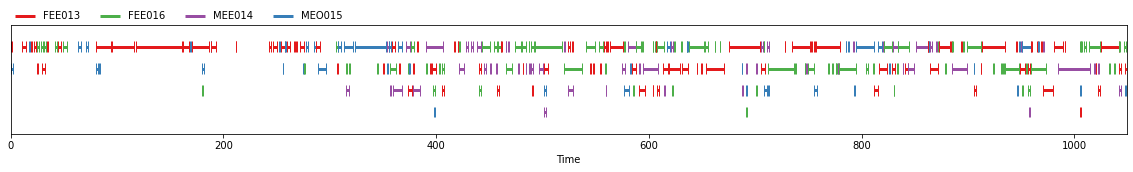

In [4]:
# load groundtruth
from pyannote.database.util import load_rttm
groundtruth = load_rttm('MixHeadset.test.rttm')[DEMO_FILE['uri']]

# visualize groundtruth
groundtruth

In [2]:
import google.colab
from pyannote.audio.features import RawAudio
from IPython.display import Audio
own_file, _ = google.colab.files.upload().popitem()
OWN_FILE = {'audio': own_file}
#notebook.reset()


Saving test2.wav to test2.wav


In [7]:

# load audio waveform and play it
waveform = RawAudio(sample_rate=16000)(OWN_FILE).data
Audio(data=waveform.squeeze(), rate=16000, autoplay=True)

Output hidden; open in https://colab.research.google.com to view.

In [3]:
import torch
pipeline = torch.hub.load('pyannote/pyannote-audio', 'dia')
diarization = pipeline(OWN_FILE)

Downloading: "https://github.com/pyannote/pyannote-audio/archive/master.zip" to /root/.cache/torch/hub/master.zip


  0%|          | 0.00/901 [00:00<?, ?B/s]

  0%|          | 0.00/1.49k [00:00<?, ?B/s]

Using cache found in /root/.cache/torch/hub/pyannote_pyannote-audio_master


  0%|          | 0.00/2.41M [00:00<?, ?B/s]

Using cache found in /root/.cache/torch/hub/pyannote_pyannote-audio_master


  0%|          | 0.00/2.40M [00:00<?, ?B/s]

Using cache found in /root/.cache/torch/hub/pyannote_pyannote-audio_master


  0%|          | 0.00/16.3M [00:00<?, ?B/s]

/usr/local/lib/python3.7/dist-packages/pyannote/audio/embedding/approaches/arcface_loss.py:170: FutureWarning:

The 's' parameter is deprecated in favor of 'scale', and will be removed in a future release

/usr/local/lib/python3.7/dist-packages/pyannote/audio/features/pretrained.py:156: UserWarning:

Model was trained with 4s chunks and is applied on 2s chunks. This might lead to sub-optimal results.

Using cache found in /root/.cache/torch/hub/pyannote_pyannote-audio_master


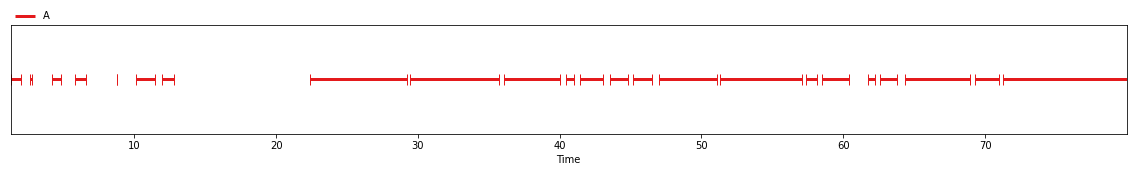

In [4]:
diarization

In [55]:
!pip install pyannote.core